##Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import make_scorer,f1_score, accuracy_score,auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from imblearn.over_sampling import SMOTE
from scipy import stats
import xgboost as xgb
import matplotlib
import sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##Reading the Data with Basic Understanding of Data

In [106]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,2012-01-01,03/2012,72,2.0,31.0,770.0,B12,0.0,786.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,2012-01-01,03/2012,95,1.0,45.0,727.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,83866,481942560913,Y,OTHER,4.500,90000,360,2012-01-01,03/2012,69,1.0,39.0,726.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,92311,676780245612,Y,"Turner, Baldwin and Rhodes",4.500,47000,240,2012-02-01,04/2012,75,1.0,43.0,688.0,B12,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,72274,433043514697,X,OTHER,4.875,177000,360,2012-01-01,03/2012,80,2.0,13.0,675.0,C86,0.0,672.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,Unnamed: 0,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,71633.000000,7.163300e+04,71633.000000,71633.000000,71633.000000,71633.000000,71633.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000,71632.000000
mean,58100.704033,5.497014e+11,3.869165,208254.226404,292.299946,67.415297,1.592409,30.718729,769.982592,2.798079,459.134311,0.003281,0.003169,0.001927,0.001871,0.001996,0.003281,0.003183,0.003755,0.004705,0.005151,0.006561,0.006938,0.007650,0.005375
std,33448.471816,2.599721e+11,0.461934,114921.451630,89.780170,17.345532,0.491390,9.722785,42.540127,8.119460,382.132442,0.057183,0.062775,0.048391,0.051468,0.054237,0.076776,0.082308,0.093483,0.110297,0.124769,0.147334,0.158941,0.168667,0.073116
min,0.000000,1.000064e+11,2.250000,14000.000000,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29189.000000,3.242829e+11,3.500000,120000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58190.000000,5.491595e+11,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,86955.000000,7.745321e+11,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,116057.000000,9.999971e+11,6.625000,915000.000000,360.000000,97.000000,2.000000,64.000000,834.000000,40.000000,836.000000,1.000000,3.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,11.000000,11.000000,1.000000




*   mean of target variable is 0.0054 whereas 75% of data lies at m13 = 0.0
*   min and max values of the target variable lies between 0 and 1



In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,71633.0,5.810070e+04,3.344847e+04,0.000000e+00,2.918900e+04,5.819000e+04,8.695500e+04,1.160570e+05
loan_id,71633.0,5.497014e+11,2.599721e+11,1.000064e+11,3.242829e+11,5.491595e+11,7.745321e+11,9.999971e+11
interest_rate,71633.0,3.869165e+00,4.619341e-01,2.250000e+00,3.500000e+00,3.875000e+00,4.125000e+00,6.625000e+00
unpaid_principal_bal,71633.0,2.082542e+05,1.149215e+05,1.400000e+04,1.200000e+05,1.820000e+05,2.780000e+05,9.150000e+05
loan_term,71633.0,2.922999e+02,8.978017e+01,6.000000e+01,1.800000e+02,3.600000e+02,3.600000e+02,3.600000e+02
loan_to_value,71633.0,6.741530e+01,1.734553e+01,6.000000e+00,5.700000e+01,7.200000e+01,8.000000e+01,9.700000e+01
number_of_borrowers,71633.0,1.592409e+00,4.913899e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
debt_to_income_ratio,71632.0,3.071873e+01,9.722785e+00,1.000000e+00,2.300000e+01,3.100000e+01,3.900000e+01,6.400000e+01
borrower_credit_score,71632.0,7.699826e+02,4.254013e+01,0.000000e+00,7.510000e+02,7.820000e+02,8.000000e+02,8.340000e+02
insurance_percent,71632.0,2.798079e+00,8.119460e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71633 entries, 0 to 71632
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                71633 non-null  int64  
 1   loan_id                   71633 non-null  int64  
 2   source                    71633 non-null  object 
 3   financial_institution     71633 non-null  object 
 4   interest_rate             71633 non-null  float64
 5   unpaid_principal_bal      71633 non-null  int64  
 6   loan_term                 71633 non-null  int64  
 7   origination_date          71633 non-null  object 
 8   first_payment_date        71633 non-null  object 
 9   loan_to_value             71633 non-null  int64  
 10  number_of_borrowers       71633 non-null  float64
 11  debt_to_income_ratio      71632 non-null  float64
 12  borrower_credit_score     71632 non-null  float64
 13  loan_purpose              71632 non-null  object 
 14  insura

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23212 entries, 0 to 23211
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23212 non-null  int64  
 1   loan_id                   23212 non-null  int64  
 2   source                    23212 non-null  object 
 3   financial_institution     23212 non-null  object 
 4   interest_rate             23212 non-null  float64
 5   unpaid_principal_bal      23212 non-null  int64  
 6   loan_term                 23212 non-null  int64  
 7   origination_date          23212 non-null  object 
 8   first_payment_date        23212 non-null  object 
 9   loan_to_value             23212 non-null  int64  
 10  number_of_borrowers       23212 non-null  float64
 11  debt_to_income_ratio      23212 non-null  float64
 12  borrower_credit_score     23212 non-null  float64
 13  loan_purpose              23212 non-null  object 
 14  insura

In [104]:
df.shape

(92846, 30)

In [105]:
df_test.shape

(23212, 29)

In [8]:
print(df.isnull().sum())
print(df_test.isnull().sum())

Unnamed: 0                  0
loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        1
borrower_credit_score       1
loan_purpose                1
insurance_percent           1
co-borrower_credit_score    1
insurance_type              1
m1                          1
m2                          1
m3                          1
m4                          1
m5                          1
m6                          1
m7                          1
m8                          1
m9                          1
m10                         1
m11                         1
m12                         1
m13                         1
dtype: int64
Unnamed: 0                  0
loan_id                     0
source                     

In [9]:
print(df.describe(include=object))
print(df_test.describe(include=object))

       source financial_institution  ... first_payment_date loan_purpose
count   71633                 71633  ...              71633        71632
unique      3                    19  ...                  4            3
top         X                 OTHER  ...            04/2012          A23
freq    39363                 30730  ...              32667        36160

[4 rows x 5 columns]
       source financial_institution  ... first_payment_date loan_purpose
count   23212                 23212  ...              23212        23212
unique      3                    19  ...                  4            3
top         X                 OTHER  ...            04/2012          A23
freq    12791                  9933  ...              10558        11642

[4 rows x 5 columns]


In [10]:
df.dtypes
df_test.dtypes

Unnamed: 0                    int64
loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                         

In [11]:
df['m13'].value_counts()

0.0    71247
1.0      385
Name: m13, dtype: int64

Clearly Class Imbalance is present


In [12]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))

number of duplicate rows: (0, 30)


##Basic EDA

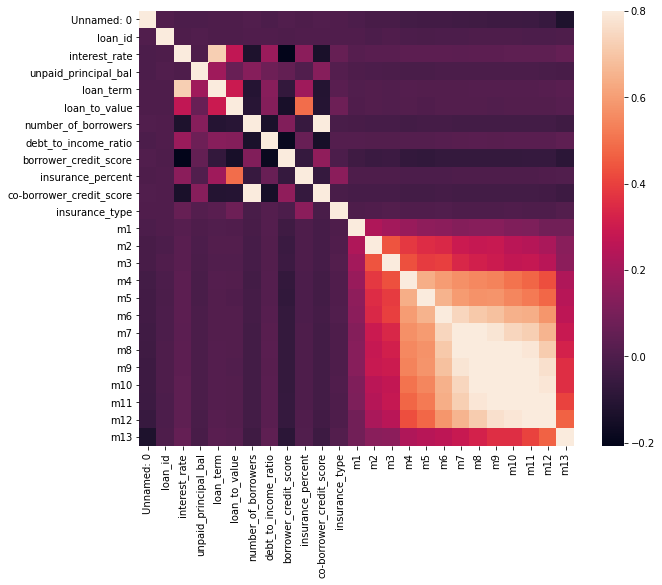

In [13]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Correlation

When two sets of data are strongly linked together we say they have a High Correlation.

The word Correlation is made of Co- (meaning "together"), and Relation

Correlation is Positive when the values increase together, and Correlation is Negative when one value decreases as the other increases A correlation is assumed to be linear (following a line).

correlation examples Correlation can have a value:

1 is a perfect positive correlation 0 is no correlation (the values don't seem linked at all) -1 is a perfect negative correlation The value shows how good the correlation is (not how steep the line is), and if it is positive or negative.

In [14]:
# method to add percentage on the plot
sns.set()
total = float(len(df))
def add_percentage(ax, total):
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x()+i.get_width()/2.,height + 5,'{:1.2f}'.format(height/total*100) + '%')

In [15]:
df['m13'].value_counts()/len(df)

0.0    0.994611
1.0    0.005375
Name: m13, dtype: float64

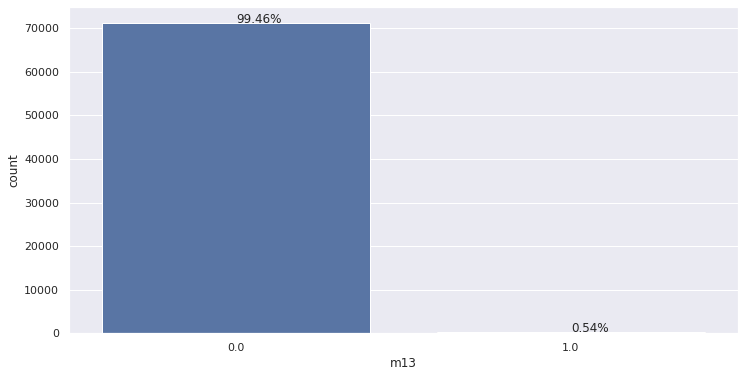

In [16]:
plt.figure(figsize=(12,6))
ax =  sns.countplot(df.m13)
add_percentage(ax, total)

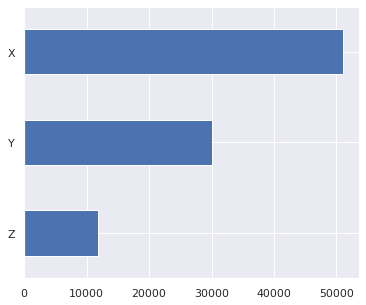

In [108]:
df.source.value_counts(ascending=True).plot.barh(figsize=(6,5))

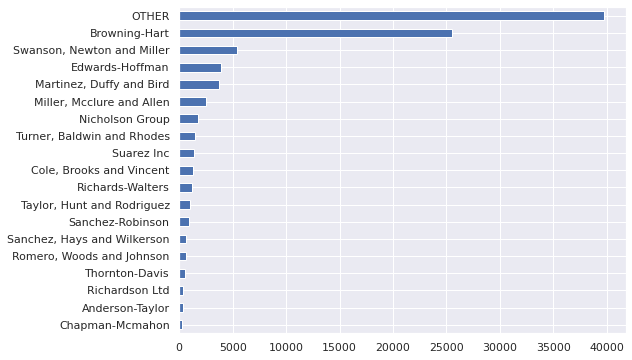

In [110]:
df.financial_institution.value_counts(ascending=True).plot.barh(figsize=(8,6))

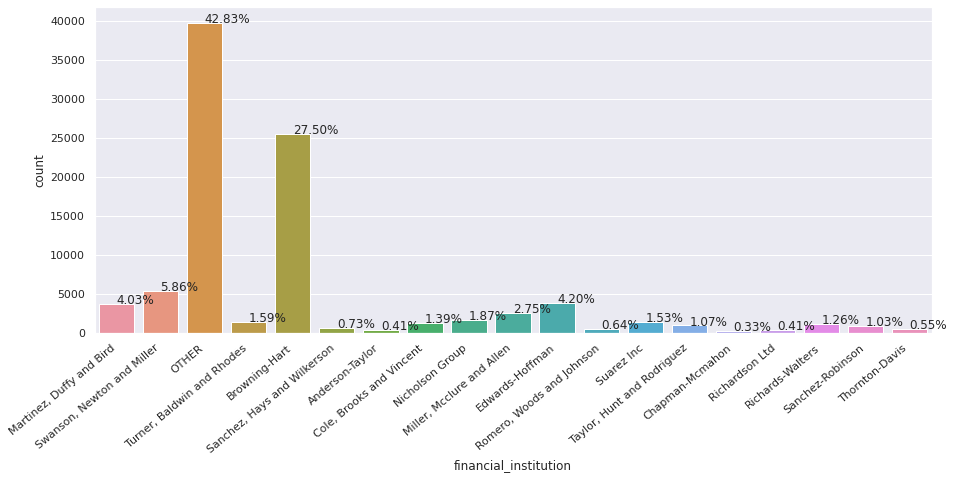

In [114]:
plt.figure(figsize=(15,6))
total = float(len(df))
ax= sns.countplot(df.financial_institution)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
add_percentage(ax, total)

##Encoding Catrgorical Data


In [17]:
df.describe(include=object)

,source,financial_institution,origination_date,first_payment_date,loan_purpose
count,71633,71633,71633,71633,71632
unique,3,19,3,4,3
top,X,OTHER,2012-02-01,04/2012,A23
freq,39363,30730,32383,32667,36160


In [18]:
df.first_payment_date.value_counts()

04/2012    32667
03/2012    29329
05/2012     9301
02/2012      336
Name: first_payment_date, dtype: int64

In [19]:
df.origination_date.value_counts()

2012-02-01    32383
2012-01-01    30204
2012-03-01     9046
Name: origination_date, dtype: int64

In [28]:
df.loan_purpose.value_counts()

A23    36160
B12    18059
C86    17413
Name: loan_purpose, dtype: int64

In [21]:
df.source.value_counts()

X    39363
Y    23164
Z     9106
Name: source, dtype: int64

In [22]:
df.financial_institution.value_counts()

OTHER                          30730
Browning-Hart                  19538
Swanson, Newton and Miller      4216
Edwards-Hoffman                 2981
Martinez, Duffy and Bird        2878
Miller, Mcclure and Allen       1979
Nicholson Group                 1361
Turner, Baldwin and Rhodes      1164
Suarez Inc                      1108
Cole, Brooks and Vincent        1022
Richards-Walters                 918
Taylor, Hunt and Rodriguez       780
Sanchez-Robinson                 746
Sanchez, Hays and Wilkerson      520
Romero, Woods and Johnson        454
Thornton-Davis                   398
Richardson Ltd                   302
Anderson-Taylor                  297
Chapman-Mcmahon                  241
Name: financial_institution, dtype: int64

In [23]:
le = LabelEncoder()


In [42]:
df.source = le.fit_transform(df.source)
df.source.value_counts()

0    51067
1    30018
2    11761
Name: source, dtype: int64

In [43]:
df.loan_purpose = le.fit_transform(df.loan_purpose)
df.loan_purpose.value_counts()

0    46820
1    23463
2    22563
Name: loan_purpose, dtype: int64

In [44]:
df.financial_institution = le.fit_transform(df.financial_institution)
df.financial_institution.value_counts()

8     39766
1     25536
15     5444
4      3903
5      3746
6      2553
7      1733
18     1480
14     1422
3      1290
9      1169
16      998
13      956
12      679
11      596
17      510
10      384
0       377
2       304
Name: financial_institution, dtype: int64

In [45]:
df.origination_date = df['origination_date'].str.split('-').str[1]
df.origination_date = df.origination_date.astype(int)


In [46]:
df.first_payment_date = pd.to_datetime(df.first_payment_date, format ='%m/%Y' ).dt.month

In [47]:
df.origination_date.value_counts()

2    41951
1    39235
3    11660
Name: origination_date, dtype: int64

In [48]:
df.first_payment_date.value_counts()

4    42282
3    38138
5    12000
2      426
Name: first_payment_date, dtype: int64

In [49]:
df.describe()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,92846.000000,9.284600e+04,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000
mean,58056.849170,5.491631e+11,0.576654,6.508326,3.869010,208047.325679,292.362816,1.703003,3.709304,67.424606,1.592583,30.737792,769.963348,0.738739,2.801338,459.209982,0.003274,0.003177,0.002057,0.001853,0.001993,0.003231,0.003167,0.003845,0.004577,0.005256,0.006484,0.007098,0.007916,0.005439
std,33485.886291,2.597886e+11,0.705318,4.444553,0.461126,114625.547432,89.723293,0.678206,0.688379,17.326684,0.491356,9.730489,42.311377,0.824040,8.123954,382.068572,0.057128,0.062447,0.049621,0.050596,0.053589,0.074190,0.080327,0.091753,0.107406,0.123994,0.145742,0.158699,0.171575,0.073550
min,0.000000,1.000064e+11,0.000000,0.000000,2.250000,14000.000000,60.000000,1.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29054.250000,3.241490e+11,0.000000,1.000000,3.500000,120000.000000,180.000000,1.000000,3.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58062.500000,5.483891e+11,0.000000,8.000000,3.875000,182000.000000,360.000000,2.000000,4.000000,72.000000,2.000000,31.000000,782.000000,0.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,87035.500000,7.740564e+11,1.000000,8.000000,4.125000,278000.000000,360.000000,2.000000,4.000000,80.000000,2.000000,39.000000,800.000000,1.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,116057.000000,9.999971e+11,2.000000,18.000000,6.750000,915000.000000,360.000000,3.000000,5.000000,97.000000,2.000000,64.000000,840.000000,2.000000,40.000000,836.000000,1.000000,3.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,11.000000,11.000000,1.000000


In [50]:
df.describe(include= object)

ValueError: ignored

##Train-Test Split


In [51]:
X = df.drop(['m13'],axis=1)
y = df['m13']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

##Imputing Class Imbalance

In [53]:
#Using SMOTE
smote = SMOTE(random_state=0)
    
X_train_sm, y_train_sm =  smote.fit_sample(X_train, y_train)

##Logistics Regression

In [55]:
from sklearn.linear_model import LogisticRegression
log =LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#model on train using all the independent values in df
log_prediction = log.predict(X_train)
print('F1 score on train set using Logistic Regression :',f1_score(y_train,log_prediction))
y_prediction = log.predict(X_test)
print('F1 score on train set using Logistic Regression :',f1_score(y_test,y_prediction))

F1 score on train set using Logistic Regression : 0.0
F1 score on train set using Logistic Regression : 0.0


In [60]:
#model on train using all the independent values in df
log.fit(X_train_sm, y_train_sm)
log_prediction = log.predict(X_train_sm)
print('F1 score on train set using Logistic Regression :',f1_score(y_train_sm,log_prediction))
y_prediction = log.predict(X_test)
print('F1 score on train set using Logistic Regression :',f1_score(y_test,y_prediction))

F1 score on train set using Logistic Regression : 0.0
F1 score on train set using Logistic Regression : 0.0


##Decision Tree Regressor

In [58]:
dec=DecisionTreeClassifier()

In [77]:
dec.fit(X_train,y_train)
dec_prediction = dec.predict(X_train)
print('F1 score on train set using Decision Tree Classifier :',f1_score(y_train,dec_prediction))
y_prediction = dec.predict(X_test)
print('F1 score on train set using Decision Tree Classifier :',f1_score(y_test,y_prediction))


F1 score on train set using Decision Tree Regressor : 1.0
F1 score on train set using Decision Tree Regressor : 1.0


In [66]:
dec.fit(X_train_sm,y_train_sm)
dec_prediction = dec.predict(X_train)
print('F1 score on train set using Decision Tree Classifier :',f1_score(y_train,dec_prediction))
y_prediction = log.predict(X_test)
print('F1 score on train set using Decision Tree Classifier :',f1_score(y_test,y_prediction))

F1 score on train set using Decision Tree Regressor : 1.0
F1 score on train set using Decision Tree Regressor : 1.0


##Random Forest Classifier

In [67]:
rfc=RandomForestClassifier(n_estimators=300)

In [75]:
rfc.fit(X_train,y_train)
rfc_prediction = rfc.predict(X_train)
print('F1 score on train set using Random Forest Classifier :',f1_score(y_train,rfc_prediction))
y_prediction = rfc.predict(X_test)
print('F1 score on train set using Random Forest Classifier :',f1_score(y_test,y_prediction))

F1 score on train set using Decision Tree Regressor : 1.0
F1 score on train set using Decision Tree Regressor : 1.0


In [76]:
rfc.fit(X_train_sm,y_train_sm)
rfc_prediction = rfc.predict(X_train_sm)
print('F1 score on train set using Random Forest Classifier :',f1_score(y_train_sm,rfc_prediction))
y_prediction = rfc.predict(X_test)
print('F1 score on train set using Random Forest Classifier :',f1_score(y_test,y_prediction))

F1 score on train set using Decision Tree Regressor : 1.0
F1 score on train set using Decision Tree Regressor : 1.0


##XGBOOST


In [69]:
xgboost = xgb.XGBClassifier(max_depth=5,n_estimators=300,learning_rate=0.05)

In [84]:
xgboost.fit(X_train,y_train)
xgb_prediction = xgboost.predict(X_train)
print('F1 score on train set using XG Boost :',f1_score(y_train,xgb_prediction))
y_prediction = xgboost.predict(X_test)
print('F1 score on train set using XG Boost :',f1_score(y_test,y_prediction))

F1 score on train set using XG Boost : 1.0
F1 score on train set using XG Boost : 1.0


In [85]:
xgboost.fit(X_train_sm,y_train_sm)
xgb_prediction = xgboost.predict(X_train_sm)
print('F1 score on train set using XGBoost :',f1_score(y_train_sm,xgb_prediction))
y_prediction = xgboost.predict(X_test)
print('F1 score on train set using XG Boost :',f1_score(y_test,y_prediction))

F1 score on train set using XGBoost : 1.0


ValueError: ignored

## Feature Selection

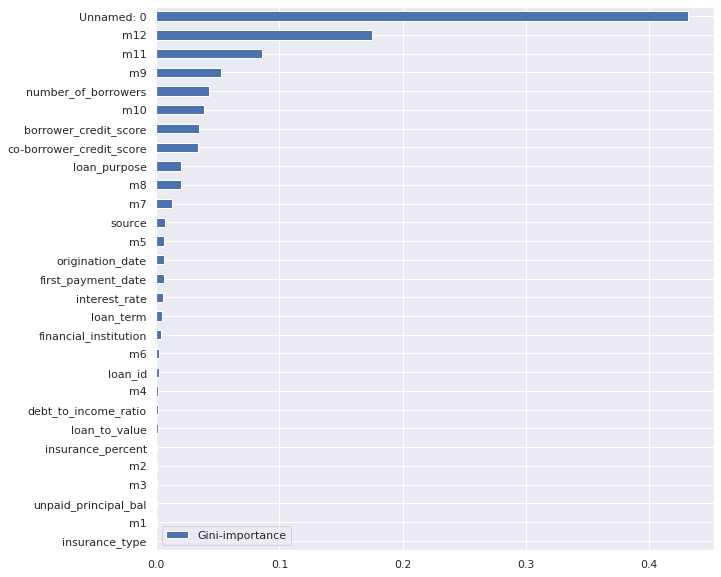

In [87]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#plt.figure(figsize=(15,7))
importances.sort_values(by='Gini-importance').plot(kind='barh',figsize=(10,10))

## Model Selection

In [88]:
df_test.head()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,68426,780423564300,X,OTHER,3.375,144000,180,2012-01-01,03/2012,73,2.0,20.0,790.0,A23,0.0,797.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,49544,472138003270,Y,Browning-Hart,4.375,110000,360,2012-01-01,03/2012,88,1.0,45.0,779.0,C86,25.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,96751,233667097068,X,Browning-Hart,4.125,243000,240,2012-02-01,04/2012,70,2.0,40.0,727.0,B12,0.0,705.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,112058,117580972208,X,OTHER,2.875,189000,120,2012-03-01,05/2012,64,2.0,35.0,798.0,A23,0.0,793.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,85610,440010429529,Z,OTHER,4.000,141000,360,2012-03-01,05/2012,84,2.0,31.0,819.0,A23,12.0,799.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
df_test.describe(include=object)

,source,financial_institution,origination_date,first_payment_date,loan_purpose
count,23212,23212,23212,23212,23212
unique,3,19,3,4,3
top,X,OTHER,2012-02-01,04/2012,A23
freq,12791,9933,10383,10558,11642


In [91]:
df_test.source = le.fit_transform(df_test.source)
df_test.loan_purpose = le.fit_transform(df_test.loan_purpose)
df_test.financial_institution = le.fit_transform(df_test.financial_institution)
df_test.origination_date = df_test['origination_date'].str.split('-').str[1]
df_test.origination_date = df_test.origination_date.astype(int)
df_test.first_payment_date = pd.to_datetime(df_test.first_payment_date, format ='%m/%Y' ).dt.month

AttributeError: ignored

In [92]:
df_test.describe(include=object)


ValueError: ignored

In [96]:
prediction = rfc.predict(df_test)

In [98]:
submission_file = pd.DataFrame(prediction,columns = ['m13' ])

In [99]:
#submission_file.set_index('m13', inplace=True)
submission_file.head()

,m13
0,0
1,0
2,0
3,0
4,0


In [100]:
submission_file.to_csv('submission_file.csv', index=True)